* # DeePTB Tutorial 1: deeptb-sk baseline model  [v2.2]

<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        Author: <a style="font-weight:normal" href="mailto:guqq@ustc.edu.cn">Gu, Qiangqiang 顾强强 📨 </a></b></i><br/>
        Date: 2025-04-20<br/>
        Protocol：<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.</a></i><br/>
        Quick Start：Click the <span style="background-color:rgb(85, 91, 228); color:white; padding: 3px; border-radius: 5px;box-shadow: 2px 2px 3px rgba(0, 0, 0, 0.3); font-size:0.75rem;">Start Connection</span> button，then wait a moment to begin.
    </p>
</div>

## Introduction

**DeePTB** is a method that uses deep learning to accelerate first-principles electronic structure simulations.

### Version Features
- **v1**: Constructed tight-binding (TB) models with first-principles accuracy (DeePTB-SK)
- **v2**: Added E3 equivariant networks to represent single-electron operators (Hamiltonian, density matrix, and overlap matrix) (DeePTB-E3)
- **v2.2**: Incorporated built-in SK empirical parameters covering commonly used elements across the periodic table

Through these capabilities, DeePTB provides multiple approaches to accelerate electronic structure simulations of materials.

### Learning Objectives

In this tutorial, you will:
1. Learn how to use built-in base model to plot band structure for given crystal structure
2. Learn how to generate a empirical sk model in deeptb-sk format for target system

## 1. Prepare Environment

In [ ]:
1. 克隆你的 GitHub 仓库
! git clone https://github.com/deepmodeling/DeePTB.git
%cd DeePTB
!/usr/bin/python3.10

In [22]:
import os
import sys
# --- 1. 安装 virtualenv ---
print("▶️ 正在安装 virtualenv...")
!pip install virtualenv -q
print("▶️ 正在创建 Python 3.10 的虚拟环境 'py310_env'...")
if not os.path.exists('/content/py310_env'):
  !virtualenv -p /usr/bin/python3.10 py310_env
else:
  print("✅ Python 3.10 的存在！")
# --- 2. 激活环境 ---
print("▶️ 正在激活环境...")
# 获取新环境的 site-packages 路径
VENV_PATH = '/content/py310_env/lib/python3.10/site-packages'
if VENV_PATH not in sys.path:
  sys.path.insert(0, VENV_PATH)
  print("   环境已成功激活！")
print("✅ Python 3.10 的隔离环境已准备就绪！")

▶️ 正在安装 virtualenv...
▶️ 正在创建 Python 3.10 的虚拟环境 'py310_env'...
✅ Python 3.10 的存在！
▶️ 正在激活环境...

✅ Python 3.1- 的隔离环境已准备就绪！


'/content/DeePTB/DeePTB/DeePTB'

In [25]:
#! git clone https://github.com/deepmodeling/DeePTB.git
os.chdir('/content/DeePTB/')
! /content/py310_env/bin/pip install "torch>=2.0.0,<=2.5.0"
! /content/py310_env/bin/python docs/auto_install_torch_scatter.py
! /content/py310_env/bin/python -m pip install .


/content/py310_env/lib/python3.10/site-packages/torch/_subclasses/functional_tensor.py:295: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:84.)
  cpu = _conversion_method_template(device=torch.device("cpu"))
The torch module has been successfully imported!
Current torch version: 2.5.0+cu124
Versions of CUDA used by PyTorch: cpu
torch-scatter will be installed from https://data.pyg.org/whl/torch-2.5.0+cu124.html...
Looking in links: https://data.pyg.org/whl/torch-2.5.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 61.3 MB/s eta 0:00:00
Installation complete, please re-run the program.
Processing /content/DeePTB
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ase-3.25.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached dargs-0.4.4-py3-none-any.whl.metadata (11 kB)
  Using cached e3nn-0

In [49]:
! source /content/py310_env/bin/activate; import matplotlib; matplotlib.use('Agg'); /content/py310_env/bin/dptb -v
#! ln -s /content/py310_env/lib/python3.10/site-packages/dptb


/bin/bash: -c: line 1: syntax error near unexpected token `'Agg''
/bin/bash: -c: line 1: ` source /content/py310_env/bin/activate; import matplotlib; matplotlib.use('Agg'); /content/py310_env/bin/dptb -v'
Traceback (most recent call last):
  File "/content/py310_env/bin/dptb", line 5, in <module>
    from dptb.__main__ import main
  File "/content/py310_env/lib/python3.10/site-packages/dptb/__main__.py", line 1, in <module>
    from dptb.entrypoints.main import main as entry_main
  File "/content/py310_env/lib/python3.10/site-packages/dptb/entrypoints/__init__.py", line 1, in <module>
    from dptb.entrypoints.train import train
  File "/content/py310_env/lib/python3.10/site-packages/dptb/entrypoints/train.py", line 1, in <module>
    from dptb.nnops.trainer import Trainer
  File "/content/py310_env/lib/python3.10/site-packages/dptb/nnops/trainer.py", line 9, in <module>
    from dptb.nnops.loss import Loss
  File "/content/py310_env/lib/python3.10/site-packages/dptb/nnops/loss.py", li

In [38]:
! ls /usr/local/bin/

accelerate			       nib-stats
accelerate-config		       nib-tck2trk
accelerate-estimate-memory	       nib-trk2tck
accelerate-launch		       nltk
accelerate-merge-weights	       normalizer
beeline				       numba
beeline.cmd			       numpy-config
bokeh				       ogr_layer_algebra.py
ccmake				       ogrmerge.py
chardetect			       openai
cmake				       panel
colab_diagnose_me		       parrec2nii
colab-fileshim.py		       pasteurize
community			       pct2rgb.py
configure_accelerate		       pip
cpack				       pip3
cpuinfo				       pip3.11
ctest				       portserver.py
cygdb				       progressbar
cython				       protoc-gen-grpclib_python
cythonize			       protoc-gen-python_betterproto
dap_multiplexer			       protoc-gen-python_grpc
dask				       proton
dask-cuda-config		       proton-viewer
dask-cuda-worker		       pt2to3
dask-scheduler			       ptdump
dask-ssh			       ptrepack
dask-worker			       pttree
datasets-cli			       pwiz.py
debugpy				       py2pyi
debugpy-adapter			     

py310_env/  sample_data/


## 1. Calculating Band Structure for a Given Structure

The deeptb-sk module now [since v2.2] has built-in empirical SK parameter models covering elements across the periodic table.

These can be directly used to obtain empirical SKTB models for given structures. It also supports directly plotting band structures for a given structure.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
workdir='/root/soft/DeePTB/examples/base_model/'
os.chdir(f"{workdir}/structures")
!tree -L 1 ./

./
├── band_gaas
├── band_si
├── gaas.vasp
├── hBN.vasp
└── silicon.vasp

2 directories, 3 files


Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

Run the band structure plotting command.
**Note** that the selection of high-symmetry paths in the Brillouin zone is based on the seekpath.get_path_orig_cell function, which has the following characteristics to be aware of:
1. It does not support 2D materials and will treat 2D materials as 3D materials
   
2. If the input cell is a non-standard primitive unit cell, the returned k path is equivalent to the k path for the standard cell. For example, the band structure calculated along the k path for the standard and non-standard unit cells will be the same up to numerical errors.
   
3. If the input cell is a supercell of a smaller primitive cell, the returned k path is that of the associated primitive cell, in the basis of supercell reciprocal lattice. In this case, the k points are not the high-symmetry points of the first Brillouin zone of the given supercell, but the high-symmetry points of the Brillouin zone of the associated primitive cell.

The command for plotting the band structure is as follows:

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

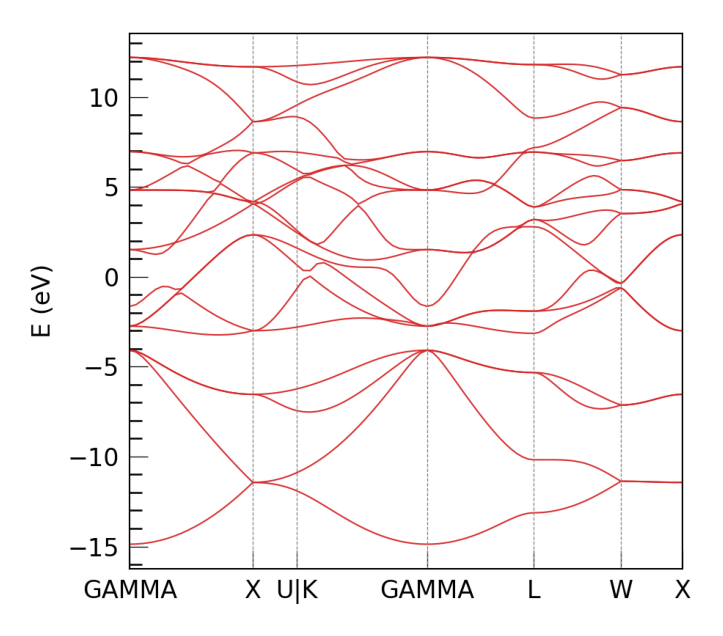

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [ ]:
# 1. Silicon
!dptb run band -i poly4 -stu silicon.vasp -o band_si

plt.figure(figsize=(10, 8))
img = mpimg.imread('./band_si/results/band.png')
plt.imshow(img)
plt.axis('off')
plt.show()

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

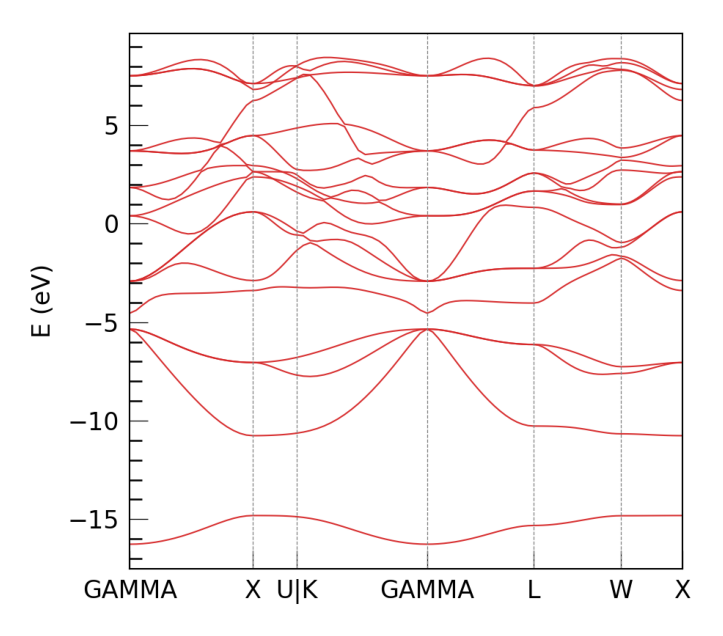

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [ ]:
# 2. GaAs
!dptb run band -i poly4 -stu gaas.vasp -o band_gaas

# display the band plot:
plt.figure(figsize=(10, 8))
img = mpimg.imread('./band_gaas/results/band.png')
plt.imshow(img)
plt.axis('off')
plt.show()

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

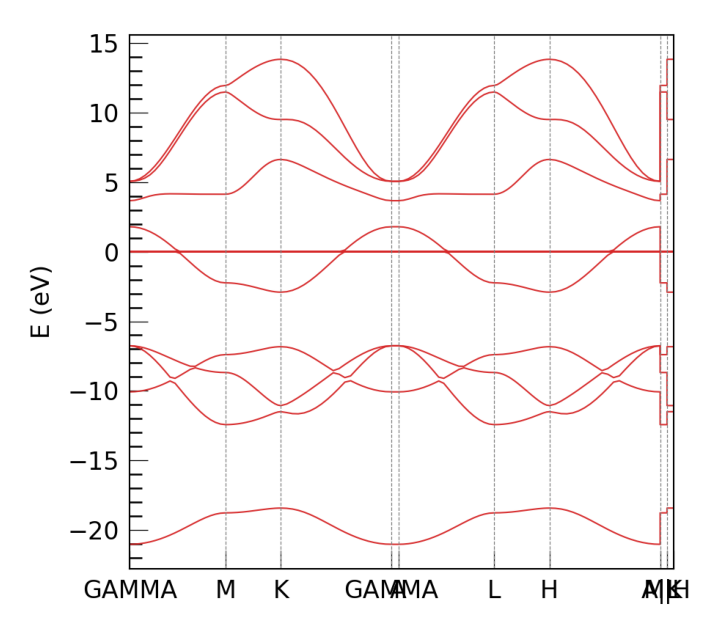

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [ ]:
# 3. hBN 2D
!dptb run band -i poly4 -stu hBN.vasp -o band_hBN

# display the band plot:
plt.figure(figsize=(10, 8))
img = mpimg.imread('./band_hBN/results/band.png')
plt.imshow(img)
plt.axis('off')
plt.show()


## 2. Extracting SK Parameter Files for a Given System

Since there is a built-in baseline model covering the periodic table, for the target research system, you can extract the empirical parameter model for your target system from this built-in baseline model.

In [ ]:
os.chdir(f"{workdir}/confs")
!tree -L 1 ./

./
├── gaas.json
├── hbn_sp.json
├── hbn_spd.json
└── silicon.json

0 directories, 4 files


Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

For the target system, we first need to define the basis set configuration and save it in a JSON file. Below is the configuration we use for hBN.

In [ ]:
!cat hbn_spd.json

{
    "common_options": {
        "basis": {
            "B": ["s","p","d"],
            "N": ["s","p","d"]
        }
    }
}

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

Run the following command to extract the empirical model settings and parameters for the target system from the built-in empirical model covering the periodic table, and save them in the sktb.json file.

In [ ]:
!dptb esk hbn_spd.json -m poly4 -o hbn_spd_model

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

The above command will create an hbn_spd_model folder and save the sktb.json model file in it.

In [ ]:
!cat hbn_spd_model/sktb.json

{
    "version": 2,
    "unit": "eV",
    "model_options": {
        "nnsk": {
            "onsite": {
                "method": "uniform_noref"
            },
            "hopping": {
                "method": "poly4pow",
                "rs": {
                    "B-B": 4.22,
                    "B-N": 4.04,
                    "N-B": 4.04,
                    "N-N": 3.85
                },
                "w": 0.2
            },
            "soc": {},
            "freeze": false,
            "push": false,
            "std": 0.01,
            "atomic_radius": "cov"
        }
    },
    "common_options": {
        "basis": {
            "B": [
                "s",
                "p",
                "d"
            ],
            "N": [
                "s",
                "p",
                "d"
            ]
        },
        "dtype": "float32",
        "device": "cuda",
        "overlap": true
    },
    "model_params": {
        "onsite": {
            "B-s-0": [
            

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

**We can also load the generated sktb.json model file to plot the band structure:**

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

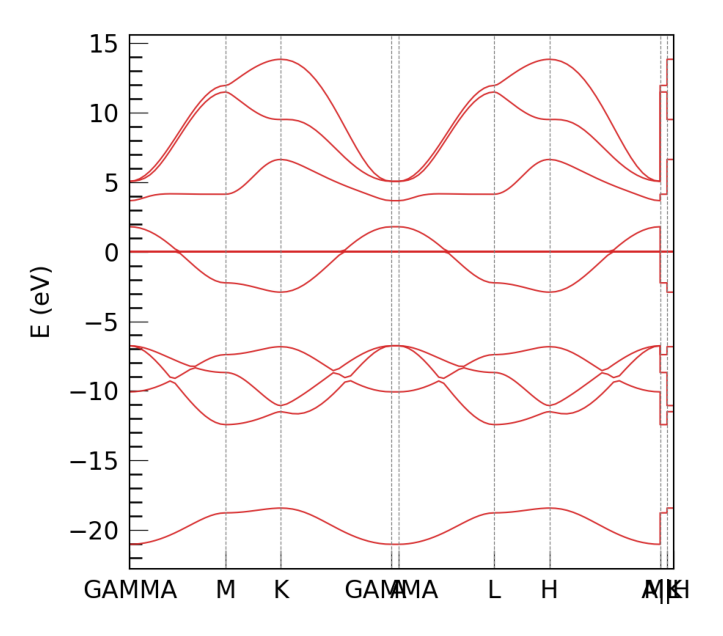

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [ ]:
!dptb run band -i ./hbn_spd_model/sktb.json -stu ../structures/hBN.vasp -o band_hBN

# display the band plot:
plt.figure(figsize=(10, 8))
img = mpimg.imread('./band_hBN/results/band.png')
plt.imshow(img)
plt.axis('off')
plt.show()



We can see that the band structure is the same as before.

Here we can choose different basis settings, e.g. `hbn_sp.json` as the input config:
```json
{
    "common_options": {
        "basis": {
            "B": ["s","p"],
            "N": ["s","p"]
        }
    }
}
```

In [ ]:
!dptb esk hbn_sp.json -m poly4 -o hbn_sp_model

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

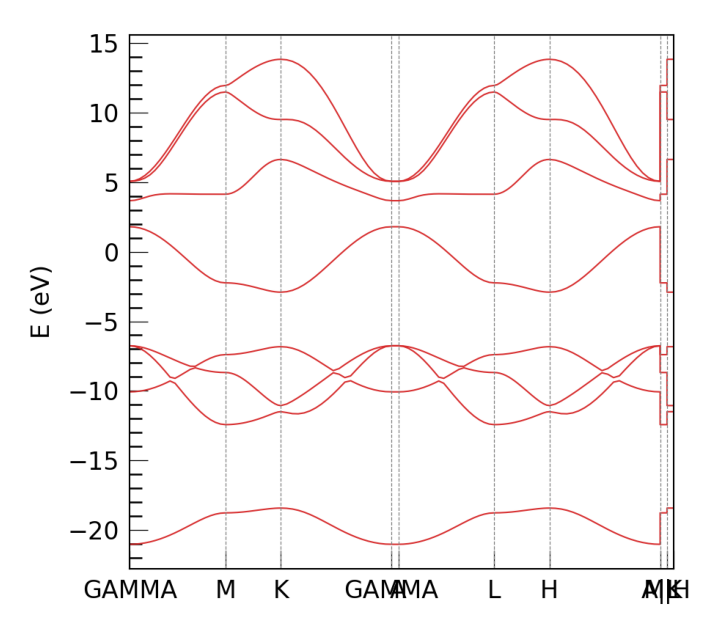

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [ ]:
!dptb run band -i ./hbn_sp_model/sktb.json -stu ../structures/hBN.vasp -o band_hBN

# display the band plot:
plt.figure(figsize=(10, 8))
img = mpimg.imread('./band_hBN/results/band.png')
plt.imshow(img)
plt.axis('off')
plt.show()


It can be clearly seen that the bands near 0 eV are missing. This is because for the hBN system, our built-in empirical model parameters only include sp orbitals. The d orbital parameters are all set to 0 just to maintain a consistent format.

Similarly, we can obtain the corresponding model parameters for individual Si and GaAs systems. Readers are invited to explore this themselves.

<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        Author: <a style="font-weight:normal" href="mailto:guqq@ustc.edu.cn">Gu, Qiangqiang : guqq@ustc.edu.cn</a>
    </p>
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        Thank you for reading!
    </p>
</div>